In [1]:
# Load Packages
import pandas as pd
# Load Data
csv_file = "Dataset .csv"
dataset = pd.read_csv(csv_file)
# Display the first few rows
dataset.head()


<ipython-input-1-619d39bbca78>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task: Top Cuisines

In [9]:
# Split the 'Cuisines' column by commas and stack the values to get individual cuisines
cuisines_split = dataset['Cuisines'].str.split(', ').explode()
# Count the frequency of each cuisine
cuisine_counts = cuisines_split.value_counts()

# Calculate the total number of restaurants and the percentage of restaurants serving each cuisine
total_restaurants = len(dataset)
top_three_cuisines = cuisine_counts.head(3)
top_three_percentages = (top_three_cuisines / total_restaurants) * 100

# Display the top three cuisines and their percentages
top_three_cuisines, top_three_percentages


(Cuisines
 North Indian    3960
 Chinese         2735
 Fast Food       1986
 Name: count, dtype: int64,
 Cuisines
 North Indian    41.461627
 Chinese         28.635745
 Fast Food       20.793634
 Name: count, dtype: float64)

## Task: City Analysis

In [13]:
# Task: City Analysis
# First the city with the highest number of restuarant
city_counts = dataset['City'].value_counts()
# Average rating for restuarnt for each city
average_rating_per_city = dataset.groupby('City')['Aggregate rating'].mean()
# Finally,  identify the city with the highest average rating.
city_with_highest_average_rating = average_rating_per_city.idxmax()
# Display the city with the highest number of restaurants.
city_with_most_restaurants = city_counts.idxmax()
# Print out result
print(city_counts)
print(average_rating_per_city)
print(city_with_highest_average_rating)
print(city_with_most_restaurants)



City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64
Inner City
New Delhi


## Task: Price Range Distribution

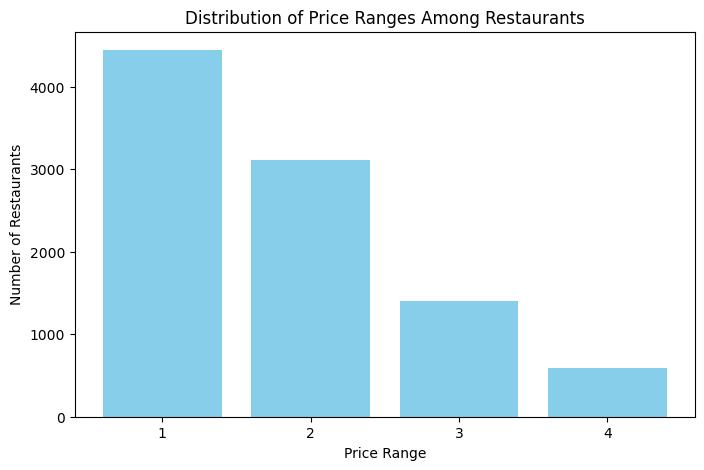

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

In [14]:
import matplotlib.pyplot as plt
# First Calculate the percentage of restuarants in each price range category
price_range_counts = dataset['Price range'].value_counts()
price_range_percentages = (price_range_counts / len(dataset)) * 100

# Create a bar chart to visualize the distribution of price ranges among restaurants.
plt.figure(figsize=(8, 5))
plt.bar(price_range_counts.index, price_range_counts, color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(ticks=price_range_counts.index, labels=price_range_counts.index)

# Show the plot
plt.show()
# Display the percentage of restuarants in each price category
price_range_percentages


## Task: Online Delivery

In [18]:
# Determine the percentage of restuarants that offer online delivery
online_delivery_count = dataset['Has Online delivery'].value_counts()
online_delivery_percentages = (online_delivery_count / len(dataset)) * 100
# Compare the average ratings of restuarnts with and without online delivery
average_rating_per_online_delivery = dataset.groupby('Has Online delivery')['Aggregate rating'].mean()

# Display the online_percentage result and average_rating_per_online_delivery result
print(online_delivery_percentages)

print(average_rating_per_online_delivery)


Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64
